In [ ]:
#Libraries
import mgwr.sel_bw
import mgwr
import pandas as pd
import geopandas as gpd
import numpy as np
import time
import os
import ee
import geetools
import geemap
from osgeo import gdal
from osgeo import osr
import fiona
import matplotlib.pyplot as plt
from matplotlib import pyplot
import folium
from folium import plugins
from IPython.display import Image
from IPython.core.display import display, HTML
import patsy
import rasterio
import rasterio.plot
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.mask import mask
from rasterio.transform import Affine
from rasterio.plot import show
import geocube
from geocube.api.core import make_geocube

In [ ]:
#Earth Engine

basemaps = {
    'Google Maps': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Maps',
        overlay = True,
        control = True
    ),
    'Google Satellite': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = True,
        control = True
    ),
    'Google Terrain': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=p&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Terrain',
        overlay = True,
        control = True
    ),
    'Google Satellite Hybrid': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = True,
        control = True
    ),
    'Esri Satellite': folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = True,
        control = True
    )
}


def add_ee_layer(self, ee_object, vis_params, name):
    try:
        # display ee.Image()
        if isinstance(ee_object, ee.image.Image):
            map_id_dict = ee.Image(ee_object).getMapId(vis_params)
            folium.raster_layers.TileLayer(
                tiles=map_id_dict['tile_fetcher'].url_format,
                attr='Google Earth Engine',
                name=name,
                overlay=True,
                control=True
            ).add_to(self)
        # display ee.ImageCollection()
        elif isinstance(ee_object, ee.imagecollection.ImageCollection):
            ee_object_new = ee_object.mosaic()
            map_id_dict = ee.Image(ee_object_new).getMapId(vis_params)
            folium.raster_layers.TileLayer(
                tiles=map_id_dict['tile_fetcher'].url_format,
                attr='Google Earth Engine',
                name=name,
                overlay=True,
                control=True
            ).add_to(self)
        # display ee.Geometry()
        elif isinstance(ee_object, ee.geometry.Geometry):
            folium.GeoJson(
                data=ee_object.getInfo(),
                name=name,
                overlay=True,
                control=True
            ).add_to(self)
        # display ee.FeatureCollection()
        elif isinstance(ee_object, ee.featurecollection.FeatureCollection):
            ee_object_new = ee.Image().paint(ee_object, 0, 2)
            map_id_dict = ee.Image(ee_object_new).getMapId(vis_params)
            folium.raster_layers.TileLayer(
                tiles=map_id_dict['tile_fetcher'].url_format,
                attr='Google Earth Engine',
                name=name,
                overlay=True,
                control=True
            ).add_to(self)

    except:
        print("Could not display {}".format(name))


# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer


ee.Authenticate()
ee.Initialize()

c:\python39\lib\site-packages\matplotlib\image.py:487: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


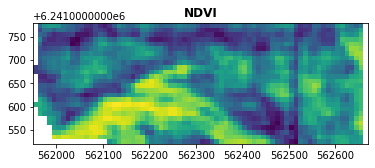

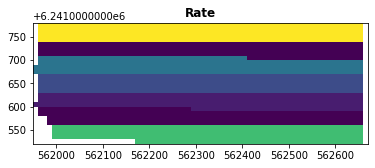

Band1 has shape (26, 72)
(1872, 1)
(1872, 1)
(1872, 1)
(1872, 1)
32767
0.7022059
(1872, 4)
[[-3.40282306e+38  3.27670000e+04  5.61955000e+05  6.24177500e+06]
 [ 4.15730327e-01  3.26000000e+02  5.61965000e+05  6.24177500e+06]
 [ 4.81195092e-01  3.26000000e+02  5.61975000e+05  6.24177500e+06]
 ...
 [ 4.93342429e-01  2.26000000e+02  5.62645000e+05  6.24152500e+06]
 [ 5.00169754e-01  2.26000000e+02  5.62655000e+05  6.24152500e+06]
 [-3.40282306e+38  3.27670000e+04  5.62665000e+05  6.24152500e+06]]
======== Fitted ===================

Summary of Results

Model type                                                         Gaussian
Number of observations:                                                1789
Number of covariates:                                                     2

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             17.506
Log-likelihood:                      

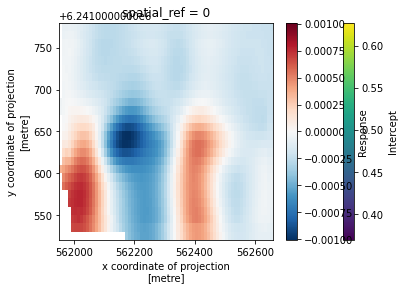

In [20]:
ndvi_path = "C:/Users/285908i/Desktop/GEE_GWR/Data/UTM 2/ndvi.tif"
ndvi = rasterio.open(ndvi_path)
rasterio.plot.show(ndvi, title = "NDVI")

rate_path = "C:/Users/285908i/Desktop/GEE_GWR/Data/UTM 2/rate_clip.tif"
rate = rasterio.open(rate_path)
rasterio.plot.show(rate, title = "Rate")

dst_crs = 'EPSG:32750'

ndvi_arr = ndvi.read(1).reshape(-1,1)
rate_arr = rate.read(1).reshape(-1,1)


with rasterio.open("C:/Users/285908i/Desktop/GEE_GWR/Data/UTM 2/ndvi.tif") as src:
            band1 = src.read(1)
            print('Band1 has shape', band1.shape)
            height = band1.shape[0]
            width = band1.shape[1]
            cols, rows = np.meshgrid(np.arange(width), np.arange(height))
            xs, ys = rasterio.transform.xy(src.transform, rows, cols)
            x= np.array(xs).reshape(-1,1)
            y= np.array(ys).reshape(-1,1)
print(x.shape)
print(y.shape)
print(ndvi_arr.shape)
print(rate_arr.shape)
print(np.max(rate_arr))
print(np.max(ndvi_arr))


stack = np.column_stack([ndvi_arr,rate_arr,x,y])
print(stack.shape)
print(stack)

df = pd.DataFrame({'NDVI': stack[:, 0], 'Rate': stack[:, 1],'X': stack[:, 2], 'Y': stack[:, 3]})
df = df.dropna(axis= 0, how = 'any')

df = df[~(df['Rate'] > 500)]  

coords = np.column_stack([df[['X','Y']]])

# bw = mgwr.sel_bw.Sel_BW(coords,
#                         np.asarray(resp),
#                         np.asarray(predi),
#                         fixed=False,
#                         kernel='gaussian',
#                         spherical=False)
#print('Searching for optimum bandwidth...')
#print(bw.search())


model = mgwr.gwr.GWR(coords,
                     np.asarray(df[['NDVI']]),
                     np.asarray(df[['Rate']]),
                     bw=50,
                     kernel = 'gaussian',
                     fixed = False,
                     constant = True,
                     spherical = False
                     )


results = model.fit()
print('======== Fitted ===================\n')

print("Summary of Results\n")
print( results.summary())

scale = results.scale
residuals = results.resid_response

pred_results = model.predict(coords, df[['Rate']], scale, residuals)
pred_results.predictions


df['Intercept'] = results.params[:, 0]
df['Response'] = results.params[:, 1]

print(df.head)


gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(x=df.X, y=df.Y)
)


gdf = gdf.set_crs(epsg = '32750')
print(gdf)

#fig, (axr, axg) = pyplot.subplots(1,2, figsize=(21,7))
cube_int = make_geocube(
     gdf,
     measurements=["Intercept"],
     #output_crs = dst_crs, 
     resolution=(10, -10),
)

cube_int.Intercept.plot()
#cube_int.Intercept.rio.to_raster("C:/Users/285908i/Desktop/GEE_GWR/Data/Result/Intercept.tif")

cube_resp = make_geocube(
     gdf,
     measurements=["Response"],
     #output_crs = dst_crs, 
     resolution=(10, -10),
)

cube_resp.Response.plot()
# print(cube)
#cube_resp.Response.rio.to_raster("C:/Users/285908i/Desktop/GEE_GWR/Data/Result/Response.tif")

int_ras = rasterio.open("C:/Users/285908i/Desktop/GEE_GWR/Data/Result/Intercept.tif")
#rasterio.plot.show(int_ras, title = "Intercept")

resp_ras = rasterio.open("C:/Users/285908i/Desktop/GEE_GWR/Data/Result/Response.tif")
#rasterio.plot.show(resp_ras, title = "Resp")



<AxesSubplot:title={'center':'Response'}>

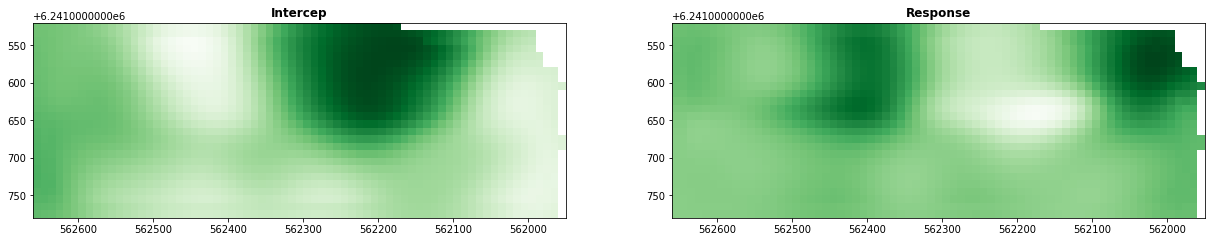

In [23]:
fig, (axr, axg) = pyplot.subplots(1,2, figsize=(21,7))
int_ras = rasterio.open("C:/Users/285908i/Desktop/GEE_GWR/Data/Result/Intercept.tif")
#rasterio.plot.show(int_ras, title = "Intercept")

resp_ras = rasterio.open("C:/Users/285908i/Desktop/GEE_GWR/Data/Result/Response.tif")
#rasterio.plot.show(resp_ras, title = "Resp")
show((int_ras, 1), ax=axr, cmap='Greens', title='Intercep')
show((resp_ras, 1), ax=axg, cmap='Greens', title='Response')

In [9]:
with rasterio.open("C:/Users/285908i/Desktop/GEE_GWR/Data/UTM 2/rate_clip.tif") as src:
            band1 = src.read(1)
            print('Band1 has shape', band1.shape)
            height = band1.shape[0]
            width = band1.shape[1]
            profile = src.profile
            transform = src.transform
        


print(profile)
print(transform)
#print(band1)


Band1 has shape (26, 72)
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': 32767.0, 'width': 72, 'height': 26, 'count': 1, 'crs': CRS.from_epsg(32750), 'transform': Affine(10.0, 0.0, 561950.0,
       0.0, -10.0, 6241780.0), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'interleave': 'band'}
| 10.00, 0.00, 561950.00|
| 0.00,-10.00, 6241780.00|
| 0.00, 0.00, 1.00|
